In [15]:
import re
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("default")

Parsing txt --> dataFrame

In [3]:
attributeNames={
    "hand":["hand_l"],
    "thumb":["thumb_01_l","thumb_02_l","thumb_03_l","thumb_end_l"],
    "index":["index_01_l","index_02_l","index_03_l","index_end_l"],
    "middle":["middle_01_l","middle_02_l","middle_03_l","middle_end_l"],
    "ring":["ring_01_l","ring_02_l","ring_03_l","ring_end_l"],
    "pinky":["pinky_01_l","pinky_02_l","pinky_03_l","pinky_end_l"]
}


In [ ]:
def getxyzOf(name,tsText):

    #finding the first match of string in tsText
    pattern="["+name+":]"
    match=re.search(name,tsText)
    if match:
        index=match.end()

        #finding the next "\n"
        match = re.search('[\n]', tsText[index:]) 
        lineLength=match.start()

        #slicing the line we need from the big string
        line=tsText[index+1:index+lineLength]

        #exctracting values from this line
        values=line.split(",")

        return values[0:3]

In [5]:
def load_data(filename):

    df=pd.DataFrame()
    
    #reading text from file
    textFile=open(filename,"r")
    text=textFile.read()
    textFile.close()

    #exctracting data for each timestamp
    pattern="ts: [0-9]*\.[0-9]*"
    rawData=re.split(pattern,text)[1:325] #324 first ts only

    #going through attributeNames one by one and extracting x y z for each name 
    # + creating a new line in the data frame containing all the values
    for i in range(len(rawData)):
        docLine={}

        for j in attributeNames.keys():
            for k in range(len(attributeNames[j])):
                name=attributeNames[j][k]
                #print(name)
                x,y,z=getxyzOf(name,rawData[i])
                doc={name+"_x":x,
                     name+"_y":y,
                     name+"_z":z}
                docLine.update(doc)

        dfLine=pd.DataFrame(docLine,index=[0])
        #print(dfLine)
        df=pd.concat([df,dfLine],ignore_index=True)
    
    print(df.head(1))         
    print("(lines,columns)",df.shape)
    return df       




In [6]:

df=load_data("skeleton_poses.txt")
df.to_csv('hand_poses.csv')

     hand_l_x    hand_l_y     hand_l_z thumb_01_l_x thumb_01_l_y thumb_01_l_z  \
0   55.084961   84.742554   102.510841    53.607822    84.320145   101.585854   

  thumb_02_l_x thumb_02_l_y thumb_02_l_z thumb_03_l_x  ... pinky_01_l_z  \
0    50.878002    84.067322    99.900742    49.454945  ...    98.880615   

  pinky_02_l_x pinky_02_l_y pinky_02_l_z pinky_03_l_x pinky_03_l_y  \
0    53.845589    88.113541    97.044128    54.466854    87.245117   

  pinky_03_l_z pinky_end_l_x pinky_end_l_y pinky_end_l_z  
0    97.840019      54.60054     87.491211     99.217194  

[1 rows x 63 columns]
(lines,columns) (324, 63)


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hand_l_x        324 non-null    object
 1   hand_l_y        324 non-null    object
 2   hand_l_z        324 non-null    object
 3   thumb_01_l_x    324 non-null    object
 4   thumb_01_l_y    324 non-null    object
 5   thumb_01_l_z    324 non-null    object
 6   thumb_02_l_x    324 non-null    object
 7   thumb_02_l_y    324 non-null    object
 8   thumb_02_l_z    324 non-null    object
 9   thumb_03_l_x    324 non-null    object
 10  thumb_03_l_y    324 non-null    object
 11  thumb_03_l_z    324 non-null    object
 12  thumb_end_l_x   324 non-null    object
 13  thumb_end_l_y   324 non-null    object
 14  thumb_end_l_z   324 non-null    object
 15  index_01_l_x    324 non-null    object
 16  index_01_l_y    324 non-null    object
 17  index_01_l_z    324 non-null    object
 18  index_02_l

In [8]:
for i in df.columns:
    df[i]=df[i].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hand_l_x        324 non-null    float64
 1   hand_l_y        324 non-null    float64
 2   hand_l_z        324 non-null    float64
 3   thumb_01_l_x    324 non-null    float64
 4   thumb_01_l_y    324 non-null    float64
 5   thumb_01_l_z    324 non-null    float64
 6   thumb_02_l_x    324 non-null    float64
 7   thumb_02_l_y    324 non-null    float64
 8   thumb_02_l_z    324 non-null    float64
 9   thumb_03_l_x    324 non-null    float64
 10  thumb_03_l_y    324 non-null    float64
 11  thumb_03_l_z    324 non-null    float64
 12  thumb_end_l_x   324 non-null    float64
 13  thumb_end_l_y   324 non-null    float64
 14  thumb_end_l_z   324 non-null    float64
 15  index_01_l_x    324 non-null    float64
 16  index_01_l_y    324 non-null    float64
 17  index_01_l_z    324 non-null    flo

In [ ]:
plt.hist(df['thumb_02_l_z'])
plt.show()

In [ ]:
df.plot.scatter("thumb_end_l_x","thumb_end_l_y","thumb_end_l_z")

###UMAP

In [9]:
import umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(df)
embedding.shape

/home/abdelaziz/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(324, 2)

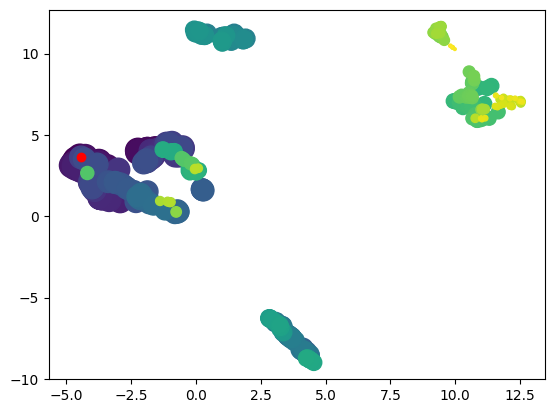

In [46]:

plt.scatter(embedding[:, 0],embedding[:, 1],c=[i for i in range(324)],s=[324-i for i in range(324)])
redpoint=3
plt.scatter(embedding[redpoint, 0],embedding[redpoint, 1],c=["red"])